## 3: Calculating Projected Loss

- Calculate the projected loss of the loans marked as Charged Off.

- Calculate the loss in revenue these loans would have generated for the company if they had finished their term. 
- Visualise the loss projected over the remaining term of these loans.

In [1]:
import pandas as pd
import sys
sys.path.append('../')
from modules.data_transform import DataTransform
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../csv_files/imputed_loan_payments.csv')

In [3]:
transformer = DataTransform()
df = transformer.encode_transform(df)
df = transformer.transform_digit_string(df)
df = transformer.cast_column_dtypes(df)

id --> int32
member_id --> int32
loan_amount --> int32
funded_amount --> float32
funded_amount_inv --> float32
term --> int32
int_rate --> float32
instalment --> float32
grade --> category
sub_grade --> category
employment_length --> int32
home_ownership --> category
annual_inc --> float32
verification_status --> category
issue_date --> date
loan_status --> category
payment_plan --> category
purpose --> category
dti --> float32
delinq_2yrs --> int32
earliest_credit_line --> date
inq_last_6mths --> int32
column not exist
column not exist
open_accounts --> int32
total_accounts --> int32
out_prncp --> float32
out_prncp_inv --> float32
total_payment --> float32
total_payment_inv --> float32
total_rec_prncp --> float32
total_rec_int --> float32
total_rec_late_fee --> float32
recoveries --> float32
collection_recovery_fee --> float32
last_payment_date --> date
last_payment_amount --> float32
column not exist
last_credit_pull_date --> date
collections_12_mths_ex_med --> int32
column not exist

In [4]:
df_charged_off = df[df['loan_status'] == 'Charged Off']
df_charged_off

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
7,7,7,38656067,41439872,26500,26500.0,26200.0,NaN,19.990000,701.950012,...,2984.919922,0.00,0.000000,0.000000,2021-08-01,701.950012,2022-01-01,0,1,INDIVIDUAL
56,56,56,38654836,41438603,11200,11200.0,11200.0,NaN,16.490000,275.290009,...,1020.989990,0.00,0.000000,0.000000,2021-08-01,275.290009,2022-01-01,0,1,INDIVIDUAL
83,83,83,38645937,41429742,1325,1325.0,1325.0,NaN,17.139999,47.340000,...,106.089996,0.00,0.000000,0.000000,2021-07-01,47.340000,2022-01-01,0,1,INDIVIDUAL
90,90,90,38645713,41429516,8150,8150.0,8150.0,NaN,19.990000,302.850006,...,762.849976,0.00,0.000000,0.000000,2021-07-01,302.850006,2021-12-01,0,1,INDIVIDUAL
117,117,117,38644867,41428644,7000,7000.0,7000.0,NaN,12.990000,235.830002,...,139.720001,0.00,1192.579956,214.664398,2021-03-01,235.830002,2021-08-01,0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54152,54152,54152,127830,127824,8000,8000.0,150.0,NaN,12.170000,266.369995,...,1474.290039,0.00,102.910004,1.040000,2015-12-01,266.369995,2016-05-01,0,1,INDIVIDUAL
54156,54156,54156,127472,127460,2125,2125.0,550.0,NaN,15.010000,73.680000,...,382.269989,0.00,1254.398804,444.250000,2015-03-01,73.680000,2022-01-01,0,1,INDIVIDUAL
54180,54180,54180,118533,117783,2500,2500.0,825.0,NaN,9.640000,80.260002,...,354.440002,1.36,0.000000,0.000000,2016-03-01,1.400000,2022-01-01,0,1,INDIVIDUAL
54194,54194,54194,113179,113093,1000,1000.0,950.0,NaN,10.590000,32.549999,...,138.639999,0.00,21.290001,0.230000,2015-05-01,32.549999,2015-10-01,0,1,INDIVIDUAL


In [5]:
# Q. Calculate the projected loss of the loans marked as Charged Off.

# The calculated projected loss of the loans that have been charged off
# funded_amount_inv -> potential loss
# collection_recovery_fee -> potential gain
# recoveries -> potential loss
# total_payment -> potential gain

# Calculate what has been paid, including recovery fee
# Take the result from the funded_amount_inv and recoveries (paid by company) to get the amount that would've been paid if not charged off
projected_charged_off_loss = (df_charged_off['funded_amount_inv'] + df_charged_off['recoveries']) - (df_charged_off['collection_recovery_fee'] + df_charged_off['total_payment_inv'])
projected_charged_off_loss

7        22065.080078
56        9293.490234
83        1042.219971
90        6341.950195
117       6323.775391
             ...     
54152      115.470016
54156      693.298828
54180      136.650024
54194      302.190002
54198      -45.820068
Length: 5571, dtype: float32

In [6]:
# sum value of projected loss of charged off loans
sum(projected_charged_off_loss)

41118264.070482716

In [7]:
# Q. Calculate the loss in revenue these loans would have generated for the company if they had finished their term. 
# Potential revenue from charge off loans
potential_revenue_charged_off = df_charged_off['funded_amount_inv'] - df_charged_off['total_payment_inv']
potential_revenue_charged_off

7        22065.080078
56        9293.490234
83        1042.219971
90        6341.950195
117       5345.859863
             ...     
54152       13.600006
54156     -116.849976
54180      136.650024
54194      281.130005
54198      -45.820068
Length: 5571, dtype: float32

In [8]:
# sum value of potential revenue of charged off loans
sum(potential_revenue_charged_off)

36817033.62017541

In [9]:
# Visualise the loss projected over the remaining term of these loans.

# Take the loss value and divide by the instalments to get the months remaining on the term
# Create data frame of 'what would have been payments' against month (up to last month of term) 
projected_charged_off_loss

7        22065.080078
56        9293.490234
83        1042.219971
90        6341.950195
117       6323.775391
             ...     
54152      115.470016
54156      693.298828
54180      136.650024
54194      302.190002
54198      -45.820068
Length: 5571, dtype: float32

In [63]:
# monthly payments 
payments = df_charged_off['instalment']
payments

7        701.950012
56       275.290009
83        47.340000
90       302.850006
117      235.830002
            ...    
54152    266.369995
54156     73.680000
54180     80.260002
54194     32.549999
54198    678.080017
Name: instalment, Length: 5571, dtype: float32

In [52]:
# Caluculate how many months are left on the term
months_left = projected_charged_off_loss / payments
months_left

7        31.433977
56       33.758907
83       22.015631
90       20.940895
117      26.814974
           ...    
54152     0.433495
54156     9.409594
54180     1.702592
54194     9.283872
54198    -0.067573
Length: 5571, dtype: float32

In [62]:
import math
months_left = months_left.apply(lambda x:math.floor(x))
#months_left = months_left[months_left >0]
months_left

7        31
56       33
83       22
90       20
117      26
         ..
54152     0
54156     9
54180     1
54194     9
54198    -1
Length: 5571, dtype: int64

In [54]:
max(months_left)

46

In [14]:
month_range = [month for month in range(1,46+1)]

In [25]:
months_left.iloc[0]

31

In [38]:
data = [payments.iloc[0] if x <= months_left.iloc[0] else 0 for x in range(1,46+1) ]
data

[701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 701.95,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [56]:
list_df = []
for index,row in enumerate(payments):
    data = [payments.iloc[index] if x <= months_left.iloc[index] else 0 for x in range(1,46+1) ]
    df = pd.DataFrame(data=data, index=month_range).T
    list_df.append(df)

In [79]:
loss_projection_df = pd.concat(list_df)
loss_projection_df

,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
0,701.950012,701.950012,701.950012,701.950012,701.950012,701.950012,701.950012,701.950012,701.950012,701.950012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,275.290009,275.290009,275.290009,275.290009,275.290009,275.290009,275.290009,275.290009,275.290009,275.290009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,47.340000,47.340000,47.340000,47.340000,47.340000,47.340000,47.340000,47.340000,47.340000,47.340000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,302.850006,302.850006,302.850006,302.850006,302.850006,302.850006,302.850006,302.850006,302.850006,302.850006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,235.830002,235.830002,235.830002,235.830002,235.830002,235.830002,235.830002,235.830002,235.830002,235.830002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,73.680000,73.680000,73.680000,73.680000,73.680000,73.680000,73.680000,73.680000,73.680000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,80.260002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,32.549999,32.549999,32.549999,32.549999,32.549999,32.549999,32.549999,32.549999,32.549999,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
loss_projection_df.to_csv('loss_projection.csv')

In [81]:
monthly_total_payments =loss_projection_df.agg('sum')
monthly_total_payments

1     2.144981e+06
2     2.122007e+06
3     2.097092e+06
4     2.072012e+06
5     2.046207e+06
6     2.012048e+06
7     1.965328e+06
8     1.923764e+06
9     1.864857e+06
10    1.807484e+06
11    1.740090e+06
12    1.668451e+06
13    1.586797e+06
14    1.515554e+06
15    1.441829e+06
16    1.362252e+06
17    1.276806e+06
18    1.185249e+06
19    1.103589e+06
20    1.020499e+06
21    9.221110e+05
22    8.251606e+05
23    7.290563e+05
24    6.404053e+05
25    5.603495e+05
26    4.800242e+05
27    4.161541e+05
28    3.527029e+05
29    2.976238e+05
30    2.586660e+05
31    2.077210e+05
32    1.727658e+05
33    1.374828e+05
34    1.092519e+05
35    8.373006e+04
36    6.258688e+04
37    4.847770e+04
38    3.394363e+04
39    2.351088e+04
40    1.873183e+04
41    1.054493e+04
42    5.796720e+03
43    3.123540e+03
44    1.627230e+03
45    1.559380e+03
46    8.929200e+02
dtype: float64

In [90]:
cumulumative_monthly_loss = []
cumulative_payments = 0
for payment in monthly_total_payments:
    cumulative_payments += payment
    cumulumative_monthly_loss.append(cumulative_payments)

In [200]:
import numpy as np
np.array(cumulumative_monthly_loss)

array([ 2144980.74885368,  4266987.53777695,  6364079.75663185,
        8436091.48558044, 10482298.03446388, 12494346.13349152,
       14459674.51262474, 16383438.40196228, 18248294.93140221,
       20055779.14102554, 21795869.27078819, 23464319.85069275,
       25051116.85076714, 26566671.24071503, 28008500.41086006,
       29370751.97131538, 30647557.93163872, 31832807.05191994,
       32936396.46225166, 33956895.78285027, 34879006.81334877,
       35704167.38387489, 36433223.70441246, 37073628.96484184,
       37633978.48552132, 38114002.7260704 , 38530156.77646446,
       38882859.68692398, 39180483.49720192, 39439149.4573288 ,
       39646870.42741203, 39819636.19757462, 39957119.02782631,
       40066370.91812897, 40150100.97833824, 40212687.85848999,
       40261165.55867577, 40295109.18883324, 40318620.06886864,
       40337351.89883995, 40347896.82877159, 40353693.5486927 ,
       40356817.08865166, 40358444.31864738, 40360003.69864464,
       40360896.61862755])

In [210]:
cumulumative_monthly_loss_df = pd.DataFrame(data=cumulumative_monthly_loss, index=month_range)

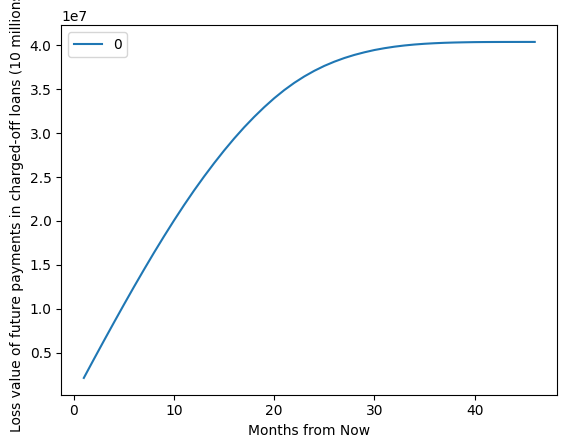

In [214]:
# Plot losses of potential monthly payments from Charged Off loans
cumulumative_monthly_loss_df.plot(kind='line',ylabel='Loss value of future payments in charged-off loans (10 millions)', xlabel='Months from Now')
plt.show()